# Market Basket Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import csv

In [3]:
# Load transactions data from the csv file
# Store into list of strings called groceries

transactions=[]
with open('/content/Market_Basket_Data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        transactions.append(row)


The data is loaded and below show the list of all transactions.

In [4]:
# Check the list
print(transactions)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra d

To get a feel of how it is structured, the code chunk below print the first transcation.

In [5]:
# Print the first transaction
print(transactions[0])

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']


In overall, there are 7501 transactions.

In [6]:
print(len(transactions))

7501


In [7]:
from itertools import permutations

# Identify the unique items
flattened = [item for transaction in transactions for item in transaction]
items= list(set(flattened))
#print(items)

In [8]:
# Number of items
# Items from all the transactions
print(f'There are {len(items)} items.\n\nThey are {", ".join(items)}')

There are 120 items.

They are vegetables mix, chicken, light mayo, energy drink, red wine, whole wheat pasta, water spray, french fries, cottage cheese, clothes accessories, ketchup, asparagus, babies food, pancakes, low fat yogurt, oil, mint, protein bar, green tea, tomato sauce, soda, almonds, olive oil,  asparagus, cookies, shallot, mayonnaise, meatballs, antioxydant juice, gums, honey, chutney, hot dogs, white wine, french wine, fromage blanc, escalope, tea, herb & pepper, magazines, candy bars, grated cheese, napkins, corn, sparkling water, pasta, salmon, green grapes, ham, yams, strong cheese, soup, oatmeal, spaghetti, nonfat milk, energy bar, zucchini, avocado, chocolate bread, hand protein bar, parmesan cheese, butter, flax seed, burgers, black tea, cauliflower, turkey, sandwich, muffins, cake, eggs, cider, extra dark chocolate, bacon, fresh bread, gluten free bar, green beans, dessert wine, spinach, pepper, body spray, frozen vegetables, barbecue sauce, yogurt cake, melons, m

In [9]:
# Compute the possible rules
rules = list(permutations(items,2))
print(rules)

[('vegetables mix', 'chicken'), ('vegetables mix', 'light mayo'), ('vegetables mix', 'energy drink'), ('vegetables mix', 'red wine'), ('vegetables mix', 'whole wheat pasta'), ('vegetables mix', 'water spray'), ('vegetables mix', 'french fries'), ('vegetables mix', 'cottage cheese'), ('vegetables mix', 'clothes accessories'), ('vegetables mix', 'ketchup'), ('vegetables mix', 'asparagus'), ('vegetables mix', 'babies food'), ('vegetables mix', 'pancakes'), ('vegetables mix', 'low fat yogurt'), ('vegetables mix', 'oil'), ('vegetables mix', 'mint'), ('vegetables mix', 'protein bar'), ('vegetables mix', 'green tea'), ('vegetables mix', 'tomato sauce'), ('vegetables mix', 'soda'), ('vegetables mix', 'almonds'), ('vegetables mix', 'olive oil'), ('vegetables mix', ' asparagus'), ('vegetables mix', 'cookies'), ('vegetables mix', 'shallot'), ('vegetables mix', 'mayonnaise'), ('vegetables mix', 'meatballs'), ('vegetables mix', 'antioxydant juice'), ('vegetables mix', 'gums'), ('vegetables mix', 'h

In [10]:
# Number of rules
print(f"This yields {len(rules)} of possible rules whereby we only had {len(items)} items and ignored multi-antecedent and multi-consequent rules.")

This yields 14280 of possible rules whereby we only had 120 items and ignored multi-antecedent and multi-consequent rules.


In [11]:
# Import the transaction encoder function from mlxtend
# If this is your first time running mlxtend
# please open your command prompt
# input: pip install mlxtend to install the package

import mlxtend
from mlxtend.preprocessing import TransactionEncoder

In [12]:
# Instantiate transaction encoder
encoder = TransactionEncoder().fit(transactions)

In [13]:
# One-hot encode itemsets by applying fit and transform
onehot = encoder.transform(transactions)

In [14]:
# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
print(display(onehot))

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


None


In [15]:
# Compute support for single items
support = onehot.mean().sort_values(ascending=False)
print(support)

mineral water    0.238368
eggs             0.179709
spaghetti        0.174110
french fries     0.170911
chocolate        0.163845
                   ...   
bramble          0.001866
cream            0.000933
napkins          0.000667
water spray      0.000400
 asparagus       0.000133
Length: 120, dtype: float64


In [16]:
# Check minimum support
print(f"{support.idxmin()} has the lowest support of {support.min()}")

# Check maximum support
print(f"{support.idxmax()} has the highest support of {support.max()}")

 asparagus has the lowest support of 0.0001333155579256099
mineral water has the highest support of 0.23836821757099053


In [17]:
onehot = onehot[(onehot>0).sum(axis="columns")>=2].reset_index(drop=True)
print(display(onehot))

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5742,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5743,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5744,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5745,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


None


After filtering, we are left with 5747 transactions that is bought more than 1 item.

#### Visualizing the rules

array([[<Axes: title={'center': 'support'}>]], dtype=object)

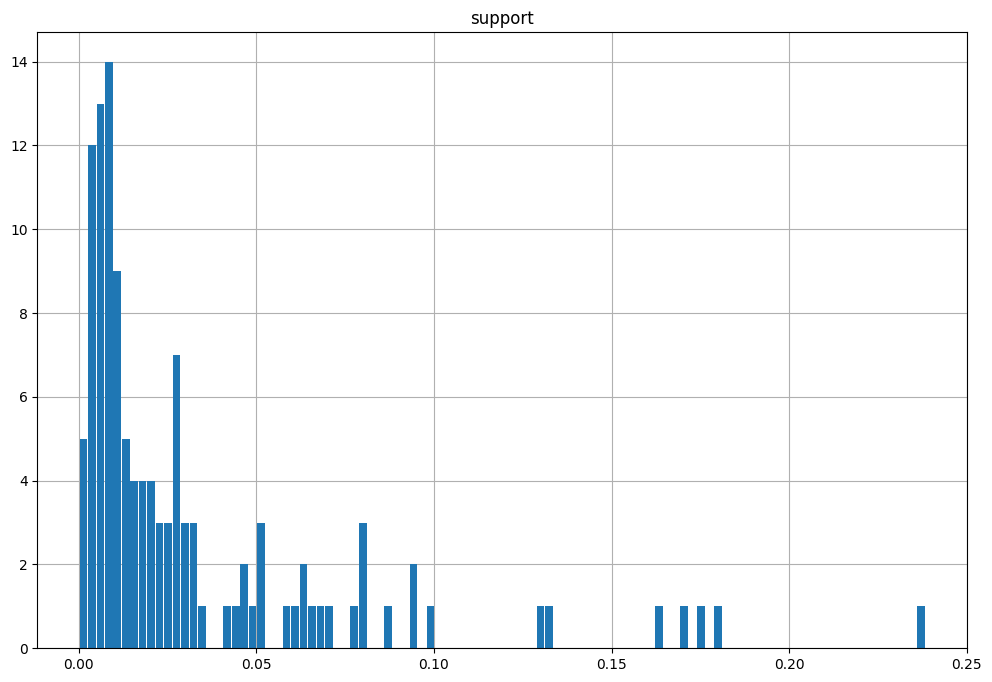

In [18]:
import matplotlib.pyplot as plt

support_df=pd.DataFrame(support,columns=["support"])
support_df.hist(bins=100, figsize=(12,8), zorder=2, rwidth=0.9)

In [19]:
support_df.describe()

,support
count,120.000000
mean,0.032616
std,0.042370
min,0.000133
25%,0.007566
50%,0.015665
75%,0.035929
max,0.238368


array([[<Axes: title={'center': 'support'}>]], dtype=object)

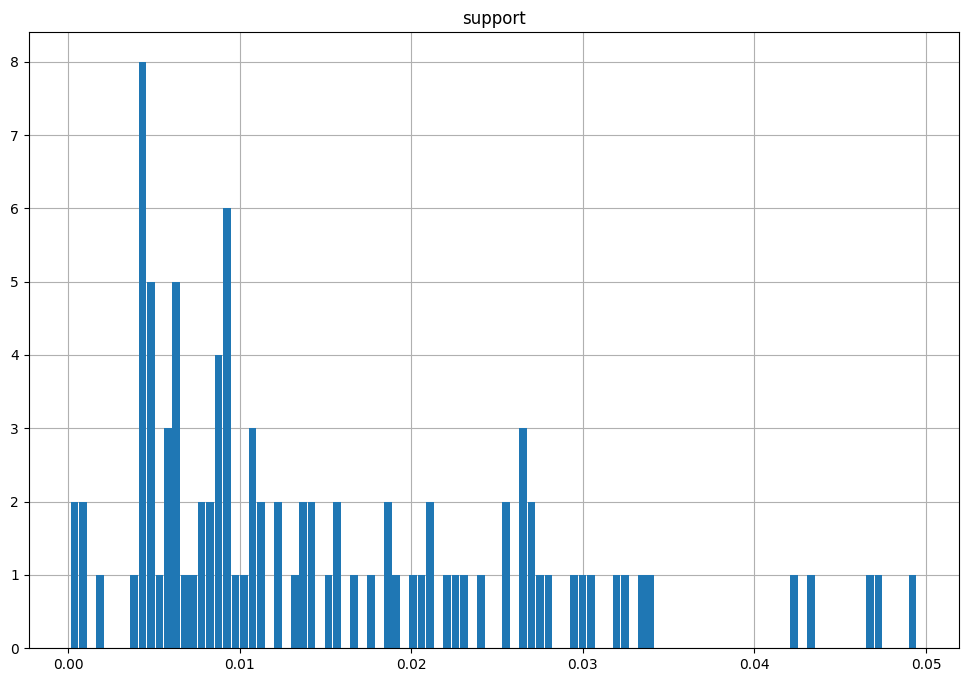

In [20]:
support_df[support_df["support"]<=0.05].hist(bins=100, figsize=(12,8), zorder=2, rwidth=0.9)

In [21]:
support_df[support_df["support"]<=0.05].describe()

,support
count,95.000000
mean,0.015032
std,0.011560
min,0.000133
25%,0.006133
50%,0.010799
75%,0.022397
max,0.049460


In [22]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import apriori, association_rules

In [23]:
print(association_rules.__module__)


mlxtend.frequent_patterns.association_rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
import mlxtend
from mlxtend.frequent_patterns import association_rules

print(association_rules.__module__)  # Should output: mlxtend.frequent_patterns


mlxtend.frequent_patterns.association_rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
from mlxtend.frequent_patterns import apriori, association_rules

import seaborn as sns

# Generate frequent itemsets
frequent_itemsets1 = apriori(onehot, min_support=0.005, use_colnames=True, max_len=2)
frequent_itemsets2 = apriori(onehot, min_support=0.005, use_colnames=True, max_len=3)
# Get the number of itemsets
num_itemsets1 = len(frequent_itemsets1)
num_itemsets2 = len(frequent_itemsets2)

# Generate association rules
# Added the 'num_itemsets' argument, though it's likely deprecated
rules1 = association_rules(frequent_itemsets1, metric='support', min_threshold=0.0, num_itemsets=num_itemsets1)
rules2 = association_rules(frequent_itemsets2, metric='support', min_threshold=0.0, num_itemsets=num_itemsets2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='antecedent support', ylabel='consequent support'>

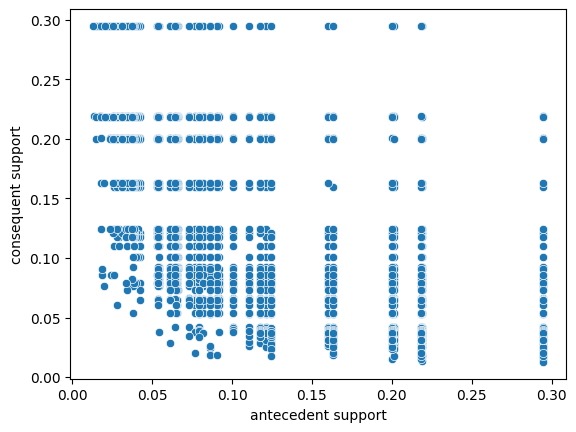

In [26]:
# Scatter plot
sns.scatterplot(x="antecedent support", y="consequent support" ,data=rules1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='antecedent support', ylabel='consequent support'>

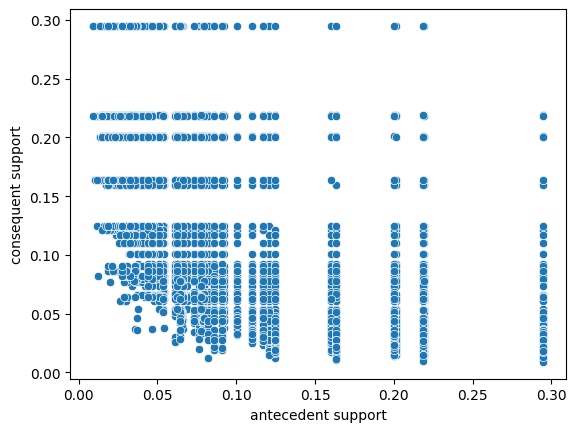

In [27]:
sns.scatterplot(x="antecedent support", y="consequent support" ,data=rules2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='antecedent support', ylabel='consequent support'>

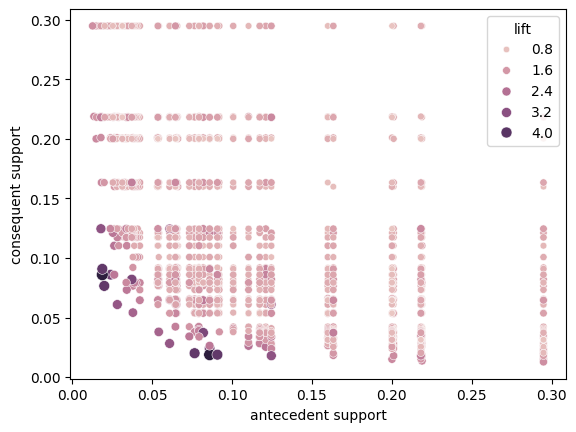

In [28]:
# Scatter plot
sns.scatterplot(x="antecedent support", y="consequent support", size="lift" ,data=rules1,hue="lift")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='antecedent support', ylabel='consequent support'>

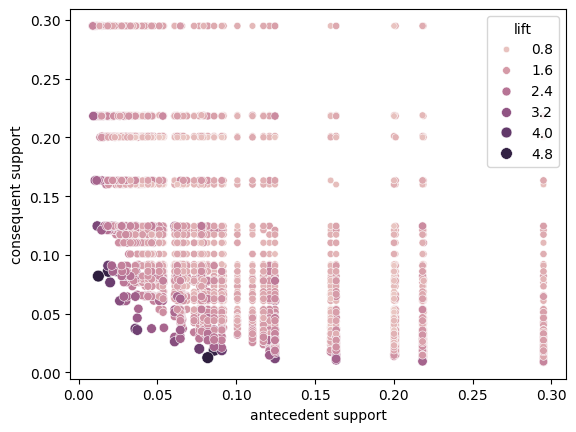

In [29]:
# Scatter plot
sns.scatterplot(x="antecedent support", y="consequent support", size="lift" ,data=rules2,hue="lift")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='support', ylabel='confidence'>

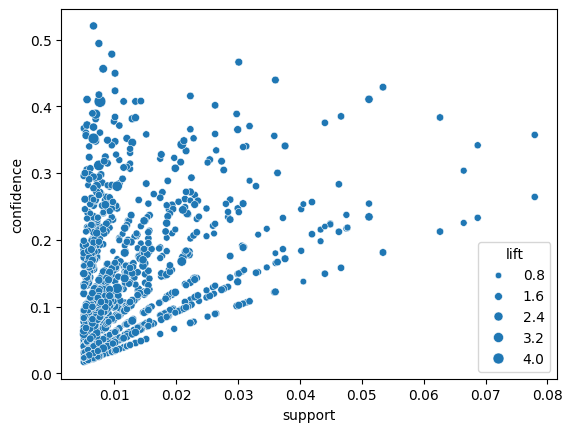

In [30]:
# Scatter plot
sns.scatterplot(x="support", y="confidence", size="lift" ,data=rules1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='support', ylabel='confidence'>

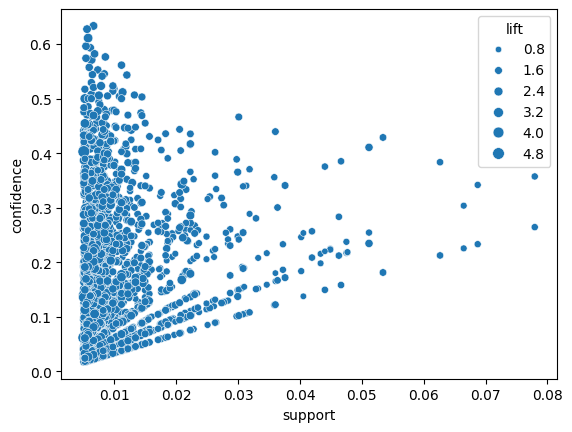

In [31]:
# Scatter plot
sns.scatterplot(x="support", y="confidence", size="lift" ,data=rules2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='support', ylabel='confidence'>

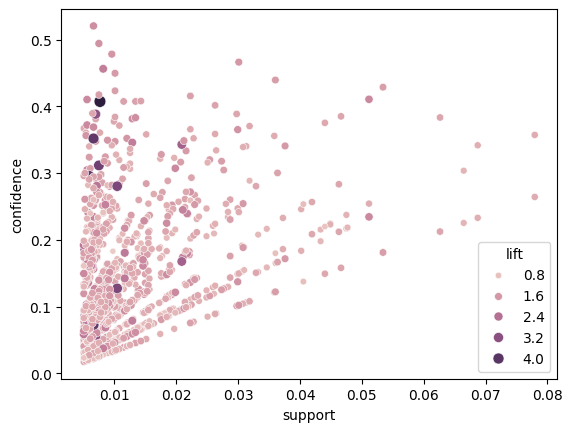

In [32]:
# Scatter plot
sns.scatterplot(x="support", y="confidence", size="lift" ,data=rules1,hue="lift")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='support', ylabel='confidence'>

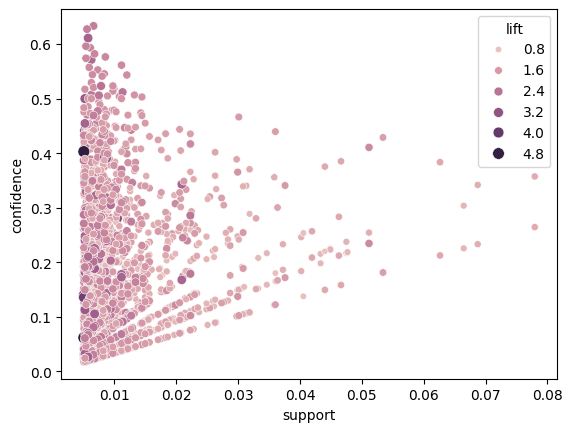

In [33]:
# Scatter plot
sns.scatterplot(x="support", y="confidence", size="lift" ,data=rules2,hue="lift")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='support', ylabel='lift'>

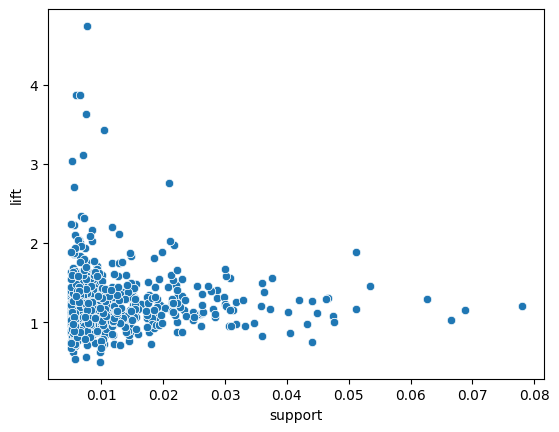

In [34]:
sns.scatterplot(x="support", y="lift" ,data=rules1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='support', ylabel='lift'>

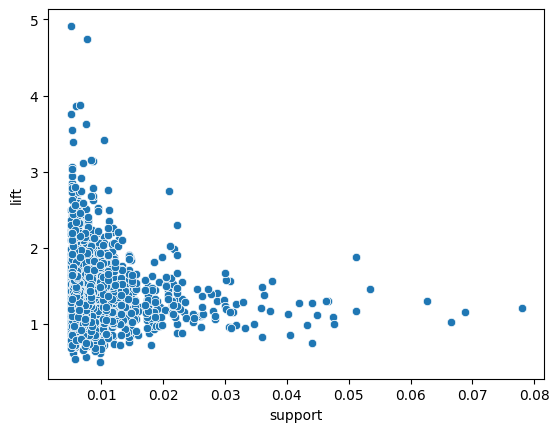

In [35]:
sns.scatterplot(x="support", y="lift" ,data=rules2)

### Apriori Implementation

In [36]:
# Compute freqent itemsets
frequent_itemsets = apriori(onehot,
                            min_support=0.005, max_len=3,
                            use_colnames=True).sort_values('support',ascending=False).reset_index(drop=True)

frequent_itemsets['length'] = frequent_itemsets["itemsets"].apply(lambda x:len(x))
# Print number of itemsets
print(len(frequent_itemsets))
print(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1040
       support                   itemsets  length
0     0.294936            (mineral water)       1
1     0.218897                     (eggs)       1
2     0.218201                (spaghetti)       1
3     0.201148                (chocolate)       1
4     0.200104             (french fries)       1
...        ...                        ...     ...
1035  0.005046      (salmon, cooking oil)       2
1036  0.005046      (spaghetti, eggplant)       2
1037  0.005046       (milk, eggs, turkey)       3
1038  0.005046    (milk, green tea, eggs)       3
1039  0.005046  (green tea, turkey, eggs)       3

[1040 rows x 3 columns]


In [37]:
num_itemsets3 = len(frequent_itemsets)
rules1 = association_rules(frequent_itemsets, metric="lift", min_threshold=3, num_itemsets=num_itemsets3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
print(display(rules1))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(olive oil),(whole wheat pasta),0.081956,0.037237,0.010440,0.127389,3.421037,1.0,0.007388,1.103313,0.770868,0.096000,0.093639,0.203881
1,(whole wheat pasta),(olive oil),0.037237,0.081956,0.010440,0.280374,3.421037,1.0,0.007388,1.275724,0.735062,0.096000,0.216131,0.203881
2,"(mineral water, herb & pepper)",(ground beef),0.022272,0.124587,0.008700,0.390625,3.135366,1.0,0.005925,1.436576,0.696572,0.062972,0.303900,0.230229
3,(ground beef),"(mineral water, herb & pepper)",0.124587,0.022272,0.008700,0.069832,3.135366,1.0,0.005925,1.051130,0.777984,0.062972,0.048643,0.230229
4,"(herb & pepper, spaghetti)",(ground beef),0.021228,0.124587,0.008352,0.393443,3.157982,1.0,0.005707,1.443249,0.698163,0.060759,0.307119,0.230241
5,(ground beef),"(herb & pepper, spaghetti)",0.124587,0.021228,0.008352,0.067039,3.157982,1.0,0.005707,1.049102,0.780594,0.060759,0.046804,0.230241
6,(escalope),(pasta),0.085958,0.018792,0.007656,0.089069,4.739616,1.0,0.006041,1.077148,0.863212,0.078853,0.071622,0.248238
7,(pasta),(escalope),0.018792,0.085958,0.007656,0.407407,4.739616,1.0,0.006041,1.542446,0.804124,0.078853,0.351679,0.248238
8,(escalope),(mushroom cream sauce),0.085958,0.024013,0.007482,0.087045,3.624963,1.0,0.005418,1.069042,0.792234,0.073005,0.064583,0.199319
9,(mushroom cream sauce),(escalope),0.024013,0.085958,0.007482,0.311594,3.624963,1.0,0.005418,1.327766,0.741951,0.073005,0.246855,0.199319


None


In [39]:
filtered_rules = rules1[(rules1['antecedent support']>0.005) &
                       (rules1['consequent support']>0.005) &
                       (rules1['confidence']>0.4) &
                       (rules1['support']>0.005) &
                       (rules1['conviction']>1)
                      ].sort_values('lift',ascending=False).reset_index(drop=True)
print(display(filtered_rules))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(mineral water, whole wheat pasta)",(olive oil),0.012528,0.081956,0.005046,0.402778,4.914573,1.0,0.004019,1.537190,0.806629,0.056420,0.349462,0.232174
1,(pasta),(escalope),0.018792,0.085958,0.007656,0.407407,4.739616,1.0,0.006041,1.542446,0.804124,0.078853,0.351679,0.248238
2,"(chocolate, herb & pepper)",(ground beef),0.011832,0.124587,0.005220,0.441176,3.541119,1.0,0.003746,1.566529,0.726196,0.039788,0.361646,0.241538
3,"(frozen vegetables, soup)",(milk),0.010440,0.163390,0.005220,0.500000,3.060170,1.0,0.003514,1.673221,0.680324,0.030960,0.402350,0.265974


None
